In [2]:
#pip install numpy scipy


In [3]:
import numpy as np
from scipy.signal import cheby1, cheby2, lfilter, freqz
import matplotlib.pyplot as plt


In [4]:

fs = 500.0
t = np.arange(0, 1.0, 1.0/fs)

freq = 5.0
signal = np.sin(2 * np.pi * freq * t) + 0.5 * np.random.normal(size=t.shape)


In [5]:

order = 4
ripple = 0.5
cutoff = 10

b, a = cheby1(order, ripple, cutoff / (0.5 * fs), btype='low')

filtered_signal = lfilter(b, a, signal)


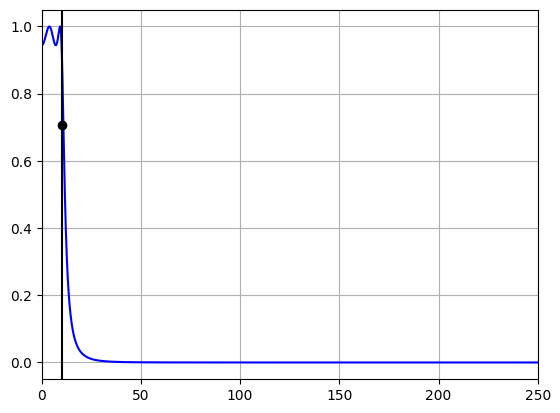

In [8]:
w, h = freqz(b, a, worN=8000)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.grid()
plt.show()

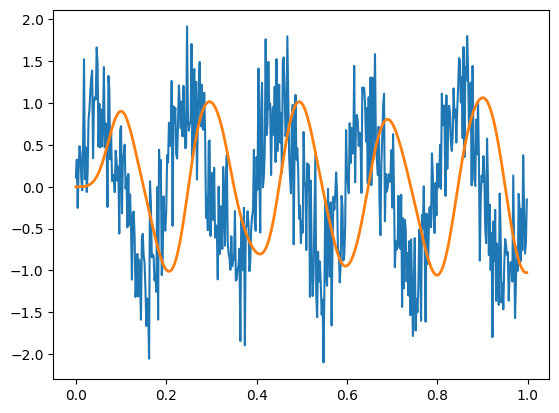

In [7]:
# Сравнение исходного и отфильтрованного сигналов
plt.figure()
plt.plot(t, signal, label='Исходный сигнал')
plt.plot(t, filtered_signal, label='Отфильтрованный сигнал', linewidth=2)
plt.show()
